In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r'C:\Users\pieta\OneDrive\Bureau\Heart_attack_model\heart_attack_prediction\Data\heart_cleaned.csv')

In [5]:
from scipy.stats import zscore

# Select numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate Z-score only for numerical columns
data[numerical_columns] = data[numerical_columns].apply(zscore)

# Filter rows where Z-scores are within the range [-3, 3] for all numerical columns
data = data[(data[numerical_columns].abs() <= 3).all(axis=1)]

# No need to drop a `z_score` column as it operates column-wise

In [6]:
# Instantiate the label encoder
labelencoder = LabelEncoder()

# Function to label-encode categorical columns and save encoders
def label_encode_and_save(data, save_path="encoders.pkl"):
    encoders = {}  # Dictionary to save encoders for each column
    for col in data.columns:
        if data[col].dtype == 'object':  # Encode only categorical columns
            encoder = LabelEncoder()
            data[col] = encoder.fit_transform(data[col])
            encoders[col] = encoder  # Save the encoder for this column

    # Save all encoders to a .pkl file
    with open(save_path, 'wb') as f:
        pickle.dump(encoders, f)
    
    return data

# Apply the label encoding and save the encoders
data = label_encode_and_save(data)


In [7]:
# Assuming 'data' is your DataFrame containing the features
scaler = StandardScaler()

# Scale the data
data_scaled = scaler.fit_transform(data)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# Save the scaler to a pickle file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Check the first few rows of the scaled data
data_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.428154,0.515943,0.224572,0.465900,0.849636,-0.550362,0.014143,1.384320,-0.822945,-0.855469,1.042496,-1.099475
1,-0.475855,-1.938199,1.270637,1.634714,-0.168122,-0.550362,0.014143,0.752973,-0.822945,0.137516,-0.622165,0.909525
2,-1.745588,0.515943,0.224572,-0.118507,0.793612,-0.550362,1.603415,-1.535661,-0.822945,-0.855469,1.042496,-1.099475
3,-0.581666,-1.938199,-0.821492,0.349019,0.149344,-0.550362,0.014143,-1.141069,1.215148,0.634008,-0.622165,0.909525
4,0.053200,0.515943,1.270637,1.050307,-0.028064,-0.550362,0.014143,-0.588640,-0.822945,-0.855469,1.042496,-1.099475


In [8]:
# Separate features (X) and target (y)
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Vérifiez si la cible est continue
print("Checking the target variable type...")
print(y_train[:10])  # Exemple de valeurs cibles

if np.issubdtype(y_train.dtype, np.number) and not np.array_equal(y_train, y_train.astype(int)):
    print("The target variable is continuous. Discretizing into classes...")
    
    # Discrétisation en classes (par exemple, 3 classes)
    y_train_discrete = pd.cut(y_train, bins=3, labels=[0, 1, 2])
    y_test_discrete = pd.cut(y_test, bins=3, labels=[0, 1, 2])
else:
    print("The target variable is already discrete.")
    y_train_discrete = y_train
    y_test_discrete = y_test

# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Définition des modèles
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(max_iter=1000, random_state=42)
}

# Entraînement et évaluation
results = []
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    try:
        model.fit(X_train_scaled, y_train_discrete)  # Entraîner
        y_pred = model.predict(X_test_scaled)  # Prédire
        acc = accuracy_score(y_test_discrete, y_pred)  # Calculer l'accuracy
        results.append({'Model': model_name, 'Accuracy': acc})
        
        print(f"{model_name}: Accuracy = {acc:.4f}")
        print(classification_report(y_test_discrete, y_pred))
    except Exception as e:
        print(f"Error training {model_name}: {e}")

# Résultats sous forme de tableau
results_df = pd.DataFrame(results)
print("\nSummary of Results:")
print(results_df)


Checking the target variable type...
815   -1.113115
546    0.898380
768   -1.113115
398    0.898380
120    0.898380
421   -1.113115
854   -1.113115
29    -1.113115
55    -1.113115
425    0.898380
Name: HeartDisease, dtype: float64
The target variable is continuous. Discretizing into classes...

Training Logistic Regression...
Logistic Regression: Accuracy = 0.8556
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        86
           2       0.81      0.94      0.87        94

    accuracy                           0.86       180
   macro avg       0.87      0.85      0.85       180
weighted avg       0.86      0.86      0.85       180


Training KNN...
KNN: Accuracy = 0.8833
              precision    recall  f1-score   support

           0       0.96      0.79      0.87        86
           2       0.83      0.97      0.90        94

    accuracy                           0.88       180
   macro avg       0.90      0.88      0.88    

C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


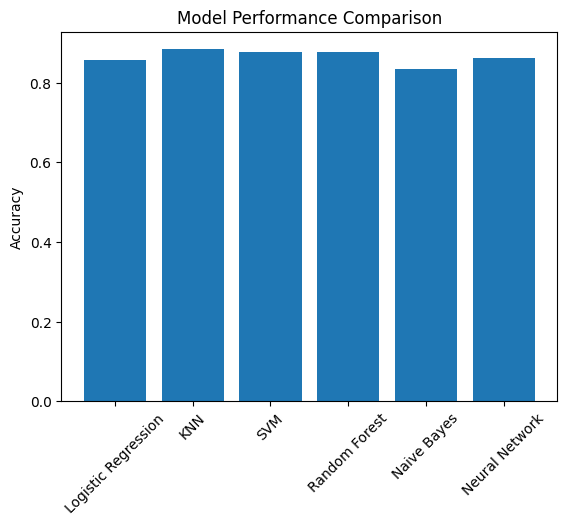

In [17]:
import matplotlib.pyplot as plt

# Plot results
plt.bar(results_df['Model'], results_df['Accuracy'])
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()

In [19]:
# save best model to pickel file

# Choose the best model

best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

# Save the best model to a .pkl file
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print(f"Best model '{best_model_name}' saved to 'best_model.pkl'")

Best model 'KNN' saved to 'best_model.pkl'
